In [2]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
from scipy import stats 
import IS as isfn
import network_mod as netfn

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Load Empirical data

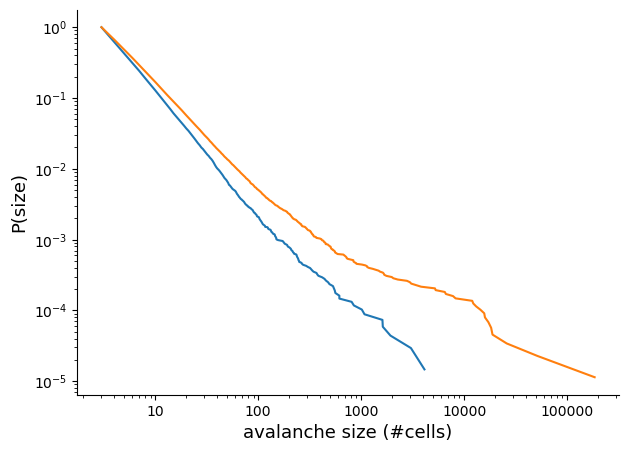

In [2]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))[:1]
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))[:1]

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1)
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1)

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Build network
* unconnected nodes from real fish structure
* k-means on all fish warped to same space: k = mean number of cells
* n cells - distance between cells in space

In [ ]:
#Plot all registered cells
fig,axarr = plt.subplots(figsize = (10,10))
comb_coords = np.load(reglist[0])
for i in range(len(reglist)-1):
    comb_coords = np.row_stack((comb_coords,np.load(reglist[i+1])))

spatial_conversion = [.5, .5, 15]
space_coord = np.multiply(comb_coords, spatial_conversion)
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'black' , alpha = 0.03)
plt.show()
#How many cell clusters - mean of all cells used in av calculation
sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Remove unwanted coords for plotting
x,y = 140, 240 
coordvec = []
for i in range(5):
    x  = x+10
    y = y-10
    xcoord = np.where(space_coord[:,0] > x)[0]
    ycoord = np.where((space_coord[:,1] > y))[0]
    coordvec = np.append(coordvec, np.intersect1d(xcoord,ycoord))
    
remaining = np.where(space_coord[:,1]< 5)
coordvec = np.append(coordvec, remaining)
coordvec = np.unique(coordvec.astype(int))

new_space_coord = np.zeros((space_coord.shape[0] - coordvec.shape[0], 3))
count=0
for i in range(space_coord.shape[0]):
    if i in coordvec:
        continue
    else:
        new_space_coord[count] = space_coord[i]
        count+=1


In [ ]:
#PLot outlier removal
fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
axarr.scatter(space_coord[:,0][coordvec], space_coord[:,1][coordvec], s = 4, color = 'red' , alpha = 0.1)
plt.show()

fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(new_space_coord[:,0], new_space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
plt.show()

sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters=n_clust, random_state=0).fit(new_space_coord)  #perform k means on all cells
klab =  kmeans.labels_
space_coord_labels = np.column_stack((new_space_coord, klab))
np.save(savepath + 'klabels-spaced-coords.npy', space_coord_labels)

In [ ]:
#Average cells by labels to make new cluster
coords = np.load(net[0])
unq = np.unique(coords[:,3]).astype(int)
node_coord = np.zeros((unq.shape[0], 3))
for i in unq:
    data = coords[np.where(coords[:,3] == unq[i])][:,:3]
    node_coord[i] = [sum(x)/len(x) for x in zip(*data)]
np.save(savepath + 'knodes-coords.npy', node_coord)

In [ ]:
fig,axarr = plt.subplots(figsize = (10,10))
coords = np.load(net[0])
axarr.scatter(coords[:,0], coords[:,1], s = 4, color = 'grey' , alpha = 0.05)
axarr.scatter(node_coord[:,0], node_coord[:,1], s = 4, color = 'red' , alpha = 0.3)
plt.show()

# Connect network

## Network types

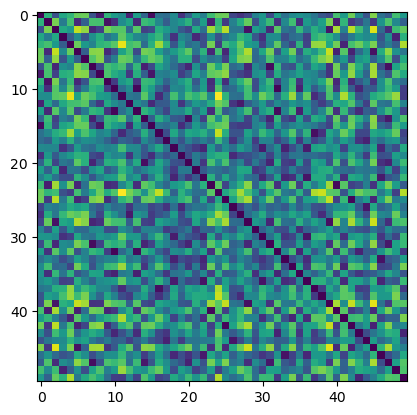

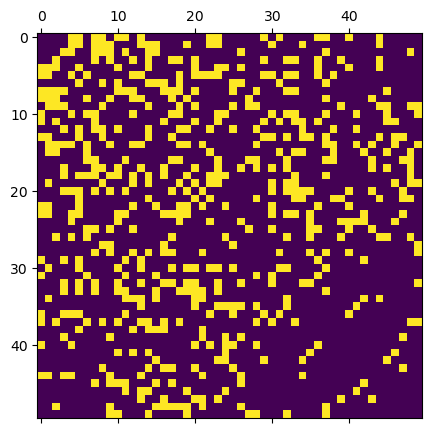

In [64]:
#Watts Strogatz - small world network
Nnodes    = 50
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
p = 0.9
k = 10
plt.imshow(dist)
plt.show()

ws = netfn.ws_netsim(dist).net_generate(k, p, 'undirected').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ws)
plt.show()



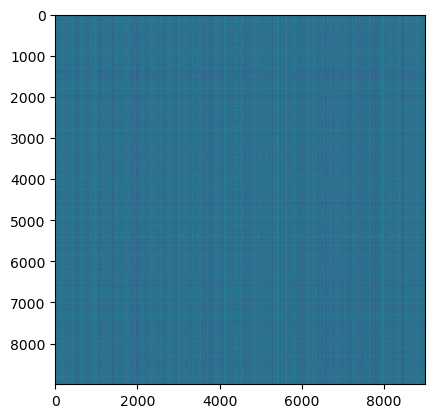

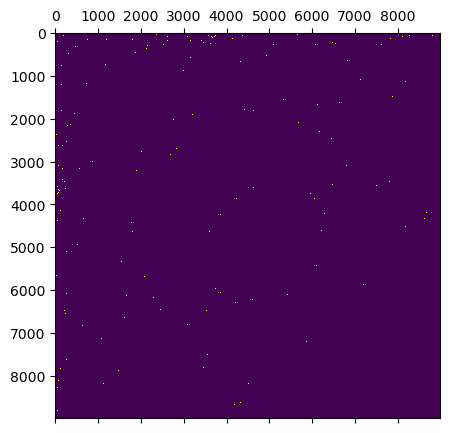

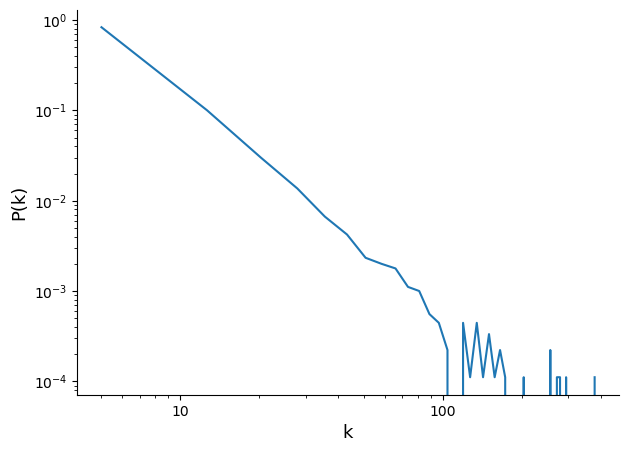

In [313]:
#Watts Strogatz - small world network
Nnodes    = nodes.shape[0]
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
k = 5
plt.imshow(dist)
plt.show()

ba = netfn.ba_netsim(dist).net_generate(k).A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ba)
plt.show()

#Degree distribution
import matplotlib 
fig, axarr = plt.subplots(figsize = (7,5))
avdistcut = np.sum(ba, axis = 1)
hist = np.histogram(avdistcut, bins = 50)
xaxis = hist[1]
yaxis = hist[0]/np.sum(hist[0])
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(k)', size = '13')
axarr.set_xlabel('k', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()




# Select parameters
* k = edge density, number of nearest neighbours to connect to
* s = edge weight (probability of firing), scaled for distance
* p = probability of rewiring - small worldness


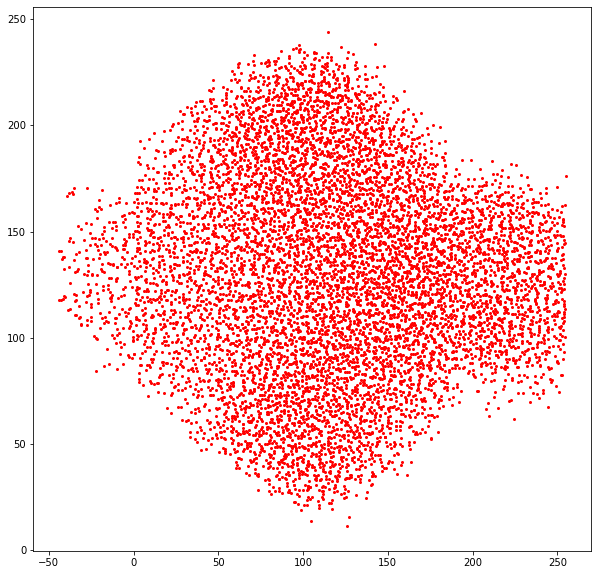

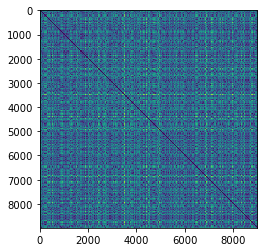

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (10,10))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 4, color = 'red' , alpha = 1)
plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

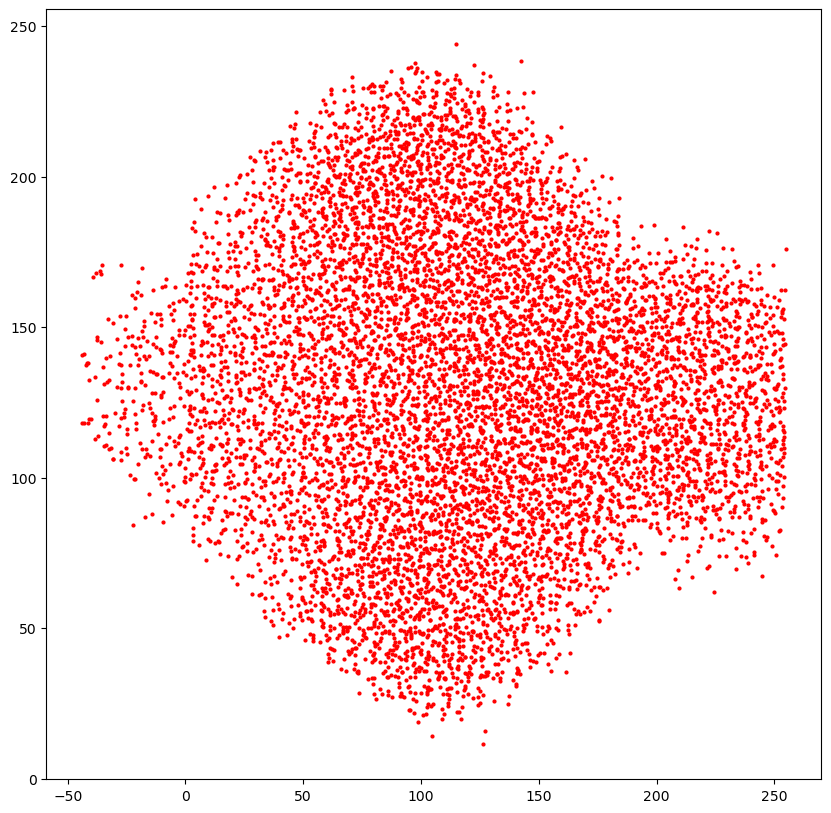

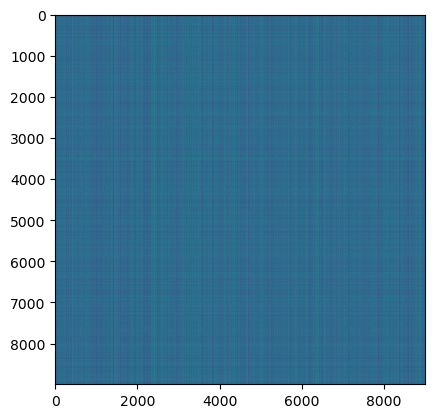

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (10,10))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 4, color = 'red' , alpha = 1)
plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

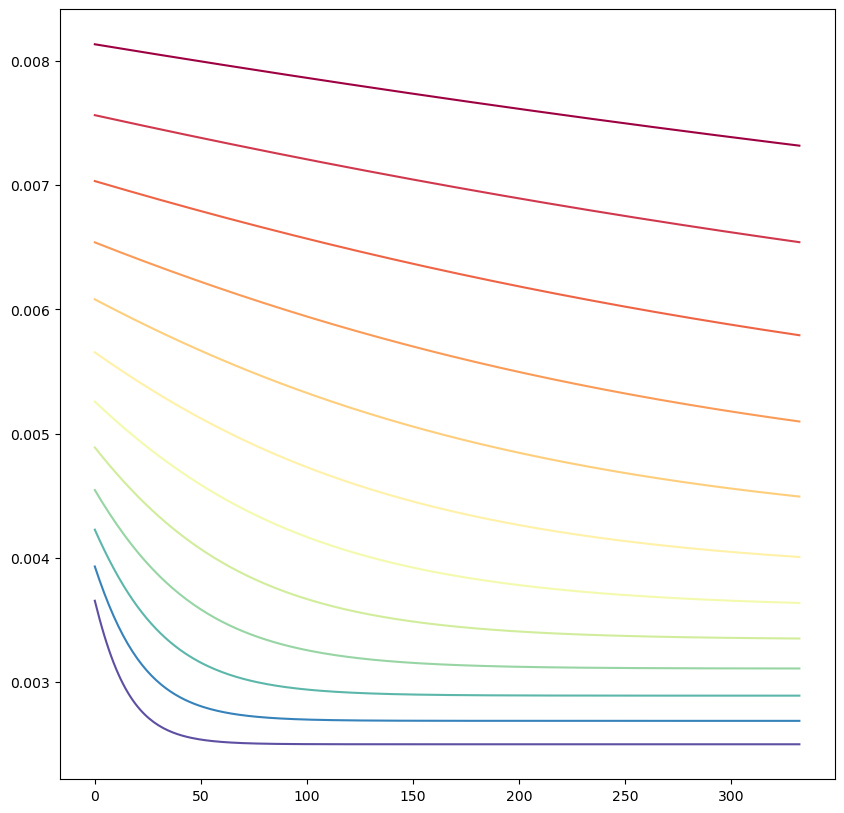

In [4]:
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, s):
  edgeweights = np.exp(s/5)*sig(np.exp(-soften/np.exp(s)*distance))/divisor
  return edgeweights

#S parameters
Nsteps  = 12
divisor = 200
soften = 0.07
s_vals   = np.array(np.linspace(0, 4, Nsteps)).tolist()

#Plot each s value
fig, ax = plt.subplots(1, figsize=(10,10))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)
for s in range(len(s_vals)):
  ax.plot(distance, dist2edge(distance, divisor, s_vals[s]), c=colors[s])
plt.show()


In [5]:
#Calculate number of simulatons to do - to have 95% chance of generating maximum avalanche
def num_sims(empirical, cutoff):
    import matplotlib.pyplot as plt
    import math
    fig, axarr = plt.subplots(figsize = (7,5))
    hist = axarr.hist(empirical, bins = 100000, density = True, histtype = 'step', cumulative = -1)
    p = 1-(10**(np.log10(hist[0])[np.where(np.log10(hist[1]) > np.log10(cutoff))[0][0]])) #probability of getting avalanches of size cutoff or smaller
    number = 0.05 
    base = p
    exponent = int(math.log(number, base)) #number of simulations as the power to which p is raised to get 95% probability 
    return(exponent)

#Simulation parameters
#======================
cutoff = 1000
n_sims= num_sims(bln_vec, cutoff)
n_sims

29156

# Add dynamics
* network of LIF neurons

# Fit parameters
* Range that captures upper + lower bound of empirical data
* k = 10 - 35 edges
* p = 0.001 - 1
* s = divisor - 200, svals - 0-5, soften - 0.07
* which network type best fits to data?

In [ ]:
#KS distance

from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import stats
total_list = []
def ks_dist(params):
    print(params)  # <-- you'll see that params is a NumPy array
    s, k  = params # <-- for readability you may wish to assign names to the component variables
    avs = netfn.ba_netsim(dist).simulate(s, int(k), 0.6,  divisor, soften, cutoff, n_sims, 1).av_size
    ks = stats.ks_2samp(empirical, avs)[0]
    total_list.append([params, ks, avs])
    print('ks = ' + str(ks))
    return ks

#Define params
empirical = empirical
dist = dist
initial_guess = [s0, k0]
bnds = ( (0,5), (10, 100))
result = minimize(ks_dist, initial_guess, bounds = bnds, method = 'BFGS')


In [ ]:
#gradient descent - no regularisation - ba net
from scipy.optimize import minimize
from scipy import stats
total_list = []
def euc_dist(params):
    print(params)  # <-- you'll see that params is a NumPy array
    s, k  = params # <-- for readability you may wish to assign names to the component variables
    avs = netfn.ba_netsim(dist).simulate(s, int(k), divisor, soften, cutoff, n_sims).av_size
    binvec = np.append(empirical,avs)
    mini = np.min(binvec)
    maxi = np.max(binvec)
    bins = 1000000
    model_hist = axarr.hist(avs, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    model_xaxis = np.log10(model_hist[1])
    model_yaxis = np.log10(model_hist[0])
    
    emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    emp_xaxis = np.log10(emp_hist[1])
    emp_yaxis = np.log10(emp_hist[0])
    xstop = np.where(model_yaxis == float("-inf"))[0][0]
    cost = np.linalg.norm(emp_yaxis[:xstop] - model_yaxis[:xstop])
    total_list.append([params, cost, avs])
    print('cost = ' + str(cost))
    return cost

#Define params
empirical = bln_vec
dist = dist
initial_guess = [s0, k0]
bnds = ((0,10), (5, 300))
result = minimize(euc_dist, initial_guess, bounds = bnds, method = 'Powell')

In [ ]:
#Regularisation parameter

lamb = 0.01
xstop = np.where(model_yaxis == float("-inf"))[0][0]
reg = lamb*(len(model_yaxis) - xstop)/10 #regularisation parameter - penalise for having empty bins in tail of dist
cost = np.linalg.norm(emp_yaxis[:xstop] - model_yaxis[:xstop]) #+ reg

In [ ]:
#Correlation

from scipy.stats.stats import pearsonr
from scipy.optimize import minimize
from scipy import stats
total_list = []
def corr_dist(params):
    print(params)  # <-- you'll see that params is a NumPy array
    s, k  = params # <-- for readability you may wish to assign names to the component variables
    avs = netfn.ba_netsim(dist).simulate(s, int(k), divisor, soften, cutoff, n_sims, 1).av_size
    binvec = np.append(empirical, np.append(empirical,avs))
    mini = np.min(binvec)
    maxi = np.max(binvec)
    bins = 1000000
    model_hist = axarr.hist(avs, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    model_xaxis = np.log10(model_hist[1])
    model_yaxis = np.log10(model_hist[0])
    
    emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    emp_xaxis = np.log10(emp_hist[1])
    emp_yaxis = np.log10(emp_hist[0])

    
    if float("-inf") in model_yaxis:
        xstop = np.where(model_yaxis == float("-inf"))[0][0]
        cost = 1 - pearsonr(emp_yaxis[:xstop], model_yaxis[:xstop])[0] #+ reg
        
    else:
        cost = 1 - pearsonr(emp_yaxis, model_yaxis)[0] #+ reg
        
        
    total_list.append([params, cost, avs])
    print('cost = ' + str(cost))
    return cost


#Define params
empirical = bln_vec
dist = dist
initial_guess = [s0, k0]
bnds = ((0,5), (20, 200))
result = minimize(corr_dist, initial_guess, bounds = bnds, method = 'Powell')

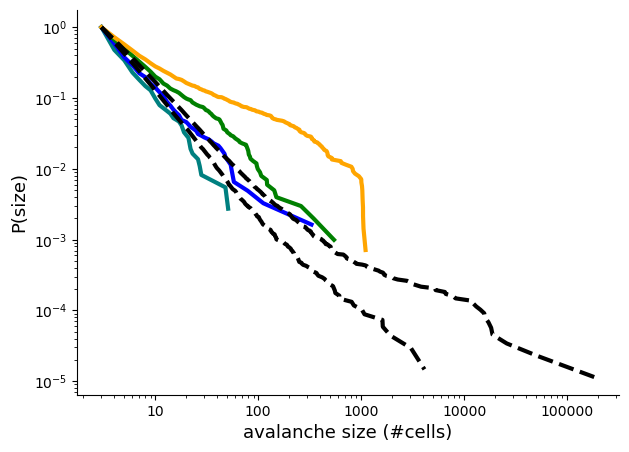

In [331]:
#Upper bound of k
curr = netfn.ba_netsim(dist).simulate(11, 2, 0, divisor, soften, cutoff, n_sims, 1).av_size
curr1 = netfn.ba_netsim(dist).simulate(11, 3, 0,  divisor, soften, cutoff, n_sims, 1).av_size
curr2 = netfn.ba_netsim(dist).simulate(11, 4, 0, divisor, soften, cutoff, n_sims, 1).av_size
curr3 = netfn.ba_netsim(dist).simulate(11, 5, 0, divisor, soften, cutoff, n_sims, 1).av_size


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy
os.chdir(F10t + 'Project/' + experiment)


#Cycle length - small network
import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5)) 
sns.reset_orig()
                   
# Node coordinates
#---------------------------------------------------------------------------

avdistcut = curr
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'teal')
avdistcut = curr1
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'blue')
avdistcut = curr2
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'green')
avdistcut = curr3
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'orange')

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Effect of individual parameters
* Bayesian approach - which singular parameter change best explains shift during seizures